## Construction of fractals
**Goal:** to master the skills of constructing fractals using IFS, L-systems, and algebraic equations.

---
## Part A. Fractal construction using the IFS method (Iterated Function System)
**Affine transformation coefficients:**
```
a = 0.745455, b = -0.45909
d = 0.406061, e = 0.887121
c = 1.460279, f = 0.691072
p = 0.912675
```


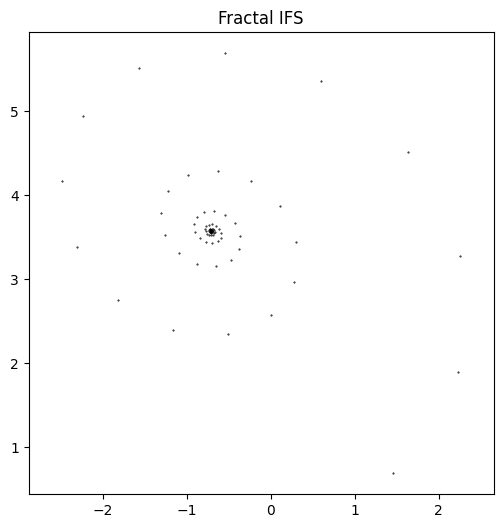

In [ ]:
# Fractal construction using the IFS method
import matplotlib.pyplot as plt
import random

# Transformation parameters
transformations = [
    {
        "a": 0.745455, "b": -0.45909, "c": 1.460279,
        "d": 0.406061, "e": 0.887121, "f": 0.691072,
        "p": 0.912675
    }
]

# Point generation
x, y = 0.0, 0.0
X, Y = [], []
for _ in range(10000):
    t = random.choices(transformations, weights=[t["p"] for t in transformations])[0]
    x, y = t["a"] * x + t["b"] * y + t["c"], t["d"] * x + t["e"] * y + t["f"]
    X.append(x)
    Y.append(y)

plt.figure(figsize=(6, 6))
plt.scatter(X, Y, s=0.2, color='black')
plt.axis('equal')
plt.title("Fractal IFS")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import math

# L-System settings
axiom = "X"
rules = {
    "F": "FF",
    "X": "F[+X]F[-X]+X"
}
angle = 20
iterations = 5

In [ ]:
def generate_lsystem(axiom, rules, depth):
    current = axiom
    for _ in range(depth):
        next_seq = ""
        for ch in current:
            next_seq += rules.get(ch, ch)
        current = next_seq
    return current

# Converting L-System to Drawing Coordinates
def draw_lsystem(instructions, angle_deg, step=1):
    angle_rad = math.radians(angle_deg)
    x, y = 0, 0
    stack = []
    theta = math.pi / 2
    points = [(x, y)]

    for cmd in instructions:
        if cmd == "F":
            x += step * math.cos(theta)
            y += step * math.sin(theta)
            points.append((x, y))
        elif cmd == "+":
            theta += angle_rad
        elif cmd == "-":
            theta -= angle_rad
        elif cmd == "[":
            stack.append((x, y, theta))
        elif cmd == "]":
            x, y, theta = stack.pop()
            points.append((x, y))

    return points

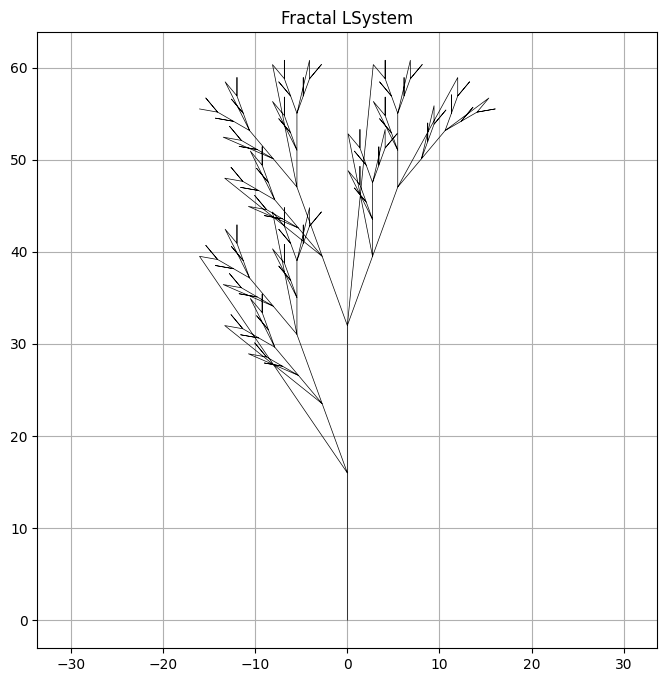

In [ ]:
sequence = generate_lsystem(axiom, rules, iterations)
points = draw_lsystem(sequence, angle, step=1)


X, Y = zip(*points)
plt.figure(figsize=(8, 8))
plt.plot(X, Y, color='black', linewidth=0.5)
plt.title("Fractal LSystem")
plt.axis('equal')
plt.grid(True)
plt.show()

In [ ]:
!pip install wntr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 92.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install --upgrade numpy wntr --no-cache-dir
import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 55.7 MB/s eta 0:00:00


In [2]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.3 MB/s eta 0:00:00


In [3]:
import wntr
import torch
from torch_geometric.data import Data
import networkx as nx


wn = wntr.network.WaterNetworkModel('Walkerton_v1.inp')
G = wn.get_graph()

<ipython-input-3-8d4d2e6c44e6>:8: DeprecationWarning: wntr.network.WaterNetworkModel.get_graph is deprecated, use wntr.network.WaterNetworkModel.to_graph instead
  G = wn.get_graph()


In [15]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# 2. Fractal structure via L-System
axiom = "X"
rules = {"F": "FF", "X": "F[+X]F[-X]+X"}
angle = 20
iterations = 4

def generate_lsystem(axiom, rules, depth):
    current = axiom
    for _ in range(depth):
        current = "".join([rules.get(ch, ch) for ch in current])
    return current

def draw_lsystem_as_graph(instructions, angle_deg, step=1.0):
    angle_rad = math.radians(angle_deg)
    x, y = 0.0, 0.0
    theta = math.pi / 2
    stack = []
    G = nx.DiGraph()
    node_id = 0
    G.add_node(node_id, pos=(x, y))
    current_node = node_id

    for cmd in instructions:
        if cmd == "F":
            x_new = x + step * math.cos(theta)
            y_new = y + step * math.sin(theta)
            node_id += 1
            G.add_node(node_id, pos=(x_new, y_new))
            G.add_edge(current_node, node_id)
            current_node = node_id
            x, y = x_new, y_new
        elif cmd == "+":
            theta += angle_rad
        elif cmd == "-":
            theta -= angle_rad
        elif cmd == "[":
            stack.append((x, y, theta, current_node))
        elif cmd == "]":
            x, y, theta, current_node = stack.pop()

    return G

In [17]:
# 3. Fractal graph generation
def generate_lsystem(axiom, rules, depth):
    current = axiom
    for _ in range(depth):
        current = "".join([rules.get(ch, ch) for ch in current])
    return current

sequence = generate_lsystem(axiom, rules, iterations)


G_fractal = draw_lsystem_as_graph(sequence, angle)

# 4. Adding to wntr
offset_x, offset_y = 1000, 1000
pos = nx.get_node_attributes(G_fractal, 'pos')
for node_id, (x, y) in pos.items():
    wn.add_junction(f'J_f{node_id}', base_demand=0.001, elevation=12, coordinates=(x+offset_x, y+offset_y))

for i, (u, v) in enumerate(G_fractal.edges):
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    length = np.hypot(x2 - x1, y2 - y1) * 100
    wn.add_pipe(f'P_f{i}', f'J_f{u}', f'J_f{v}', length=length, diameter=80, roughness=100, minor_loss=0.0)

<ipython-input-18-20fb8e1a26d3>:5: DeprecationWarning: wntr.network.WaterNetworkModel.get_graph is deprecated, use wntr.network.WaterNetworkModel.to_graph instead
  G_full = wn.get_graph()


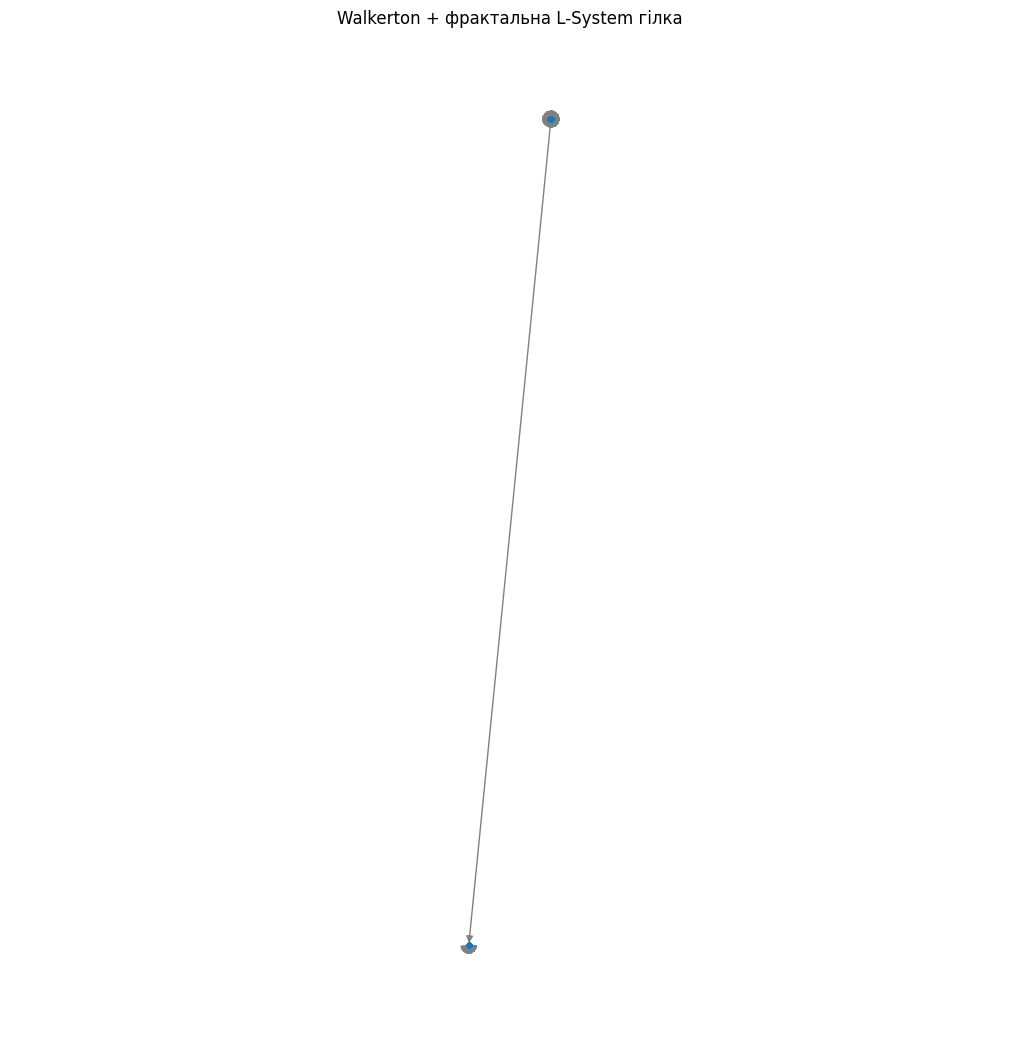

In [18]:
# 5. Connecting to a real network
wn.add_pipe('P_connect', 'J32', 'J_f0', length=10, diameter=100, roughness=100, minor_loss=0.0)


G_full = wn.get_graph()
pos_full = nx.get_node_attributes(G_full, 'pos')
plt.figure(figsize=(10, 10))
nx.draw(G_full, pos_full, node_size=10, edge_color='gray')
plt.title("Walkerton + fractal L-System branch")
plt.axis("equal")
plt.grid(True)
plt.show()

In [19]:
sim = wntr.sim.EpanetSimulator(wn)

In [20]:
results = sim.run_sim()

In [21]:
pressure = results.node['pressure']
demand = results.node['demand']
flowrate = results.link['flowrate']

<Axes: title={'center': 'Pressure in node J_f12'}, xlabel='Time [sec]', ylabel='Pressure [m]'>

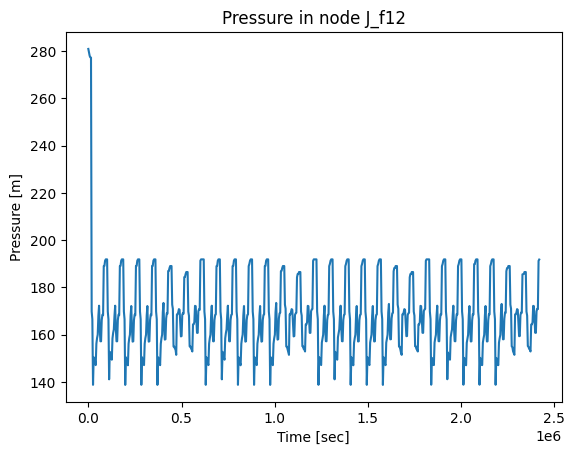

In [22]:
pressure['J_f12'].plot(title="Pressure in node J_f12", ylabel="Pressure [m]", xlabel="Time [sec]")

<Axes: title={'center': 'Average network pressure'}>

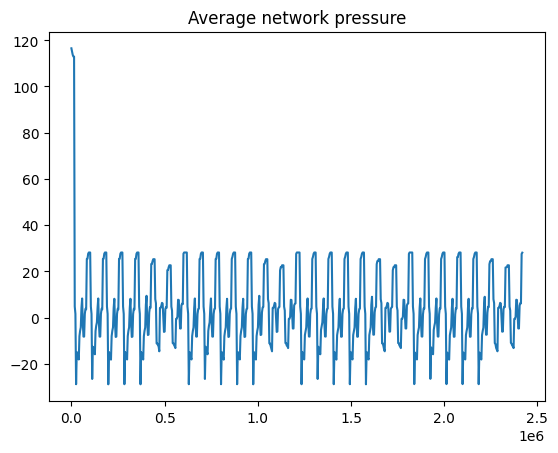

In [23]:
pressure.mean(axis=1).plot(title="Average network pressure")

In [25]:
import matplotlib.pyplot as plt
import wntr

In [32]:
import pickle

with open("fractal_network.pkl", "wb") as f:
    pickle.dump(wn, f)

In [33]:
with open("fractal_network.pkl", "rb") as f:
    wn = pickle.load(f)

In [34]:
with open("fractal_network.pkl", "rb") as f:
    wn = pickle.load(f)

In [35]:
import wntr

sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

pressure = results.node['pressure']
flowrate = results.link['flowrate']

<Figure size 1000x800 with 0 Axes>

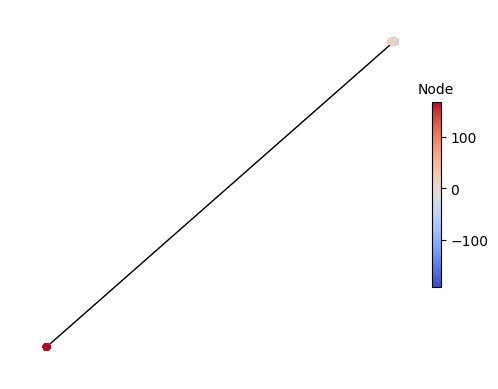

TypeError: cannot unpack non-iterable Axes object

In [37]:
import matplotlib.pyplot as plt

avg_pressure = pressure.mean(axis=0)
avg_flow = flowrate.mean(axis=0)

# Pressure visualization
plt.figure(figsize=(10, 8))
fig1, ax1 = wntr.graphics.plot_network(wn, node_attribute=avg_pressure, node_size=30, node_cmap='coolwarm')
ax1.set_title("Average pressure")
plt.show()

# Cost visualization
plt.figure(figsize=(10, 8))
fig2, ax2 = wntr.graphics.plot_network(wn, link_attribute=avg_flow, link_width=2, link_cmap='plasma')
ax2.set_title("Average consumption")
plt.show()

In [42]:
import torch
import numpy as np
from torch_geometric.data import Data
import networkx as nx

# Graph construction
G = wn.get_graph()
nodes = list(G.nodes)
edges = list(G.edges)

# Node features: [base_demand, elevation]
x = []
for n in nodes:
    node = wn.get_node(n)
    if node.node_type == 'Junction':
        x.append([node.base_demand, node.elevation])
    else:
        x.append([0.0, 0.0])
x = torch.tensor(x, dtype=torch.float)

# Edge index
edge_index = []
edge_attr = []

node_to_idx = {name: i for i, name in enumerate(wn.node_name_list)}

# Only iterate over pipes
for link_name, link in wn.pipes():
    if link.start_node_name in node_to_idx and link.end_node_name in node_to_idx:
        u = node_to_idx[link.start_node_name]
        v = node_to_idx[link.end_node_name]
        edge_index.append([u, v])
        edge_attr.append([link.length, link.diameter, link.roughness])

# 2. Converting tensors in PyTorch
import torch
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_attr = torch.tensor(edge_attr, dtype=torch.float)
# Target — last-minute pressure
y = torch.tensor(pressure.iloc[-1].values, dtype=torch.float)

# PyG object
data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)


torch.save(data, 'gnn_dataset_fractal.pt')

<ipython-input-42-6cbaa549f59d>:7: DeprecationWarning: wntr.network.WaterNetworkModel.get_graph is deprecated, use wntr.network.WaterNetworkModel.to_graph instead
  G = wn.get_graph()


---
## Part C. Algebraic fractal (Julia or Mandelbrot set)
Example: Z_{n+1} = Z_n^2 + C, where C is a constant complex number.

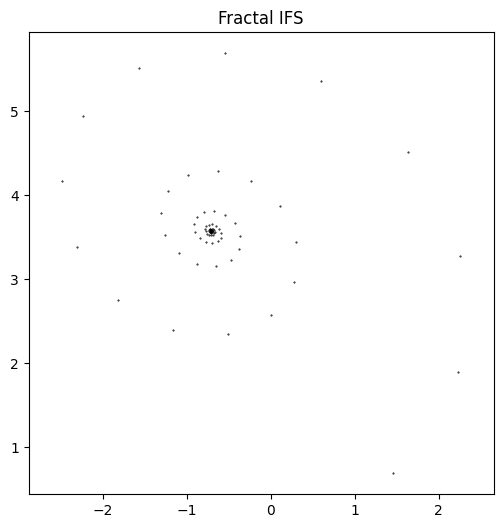

In [43]:
import matplotlib.pyplot as plt
import random


transformations = [
    {
        "a": 0.745455, "b": -0.45909, "c": 1.460279,
        "d": 0.406061, "e": 0.887121, "f": 0.691072,
        "p": 0.912675
    }
]


x, y = 0.0, 0.0
X, Y = [], []

for _ in range(10000):
    t = random.choices(transformations, weights=[t["p"] for t in transformations])[0]
    x, y = t["a"] * x + t["b"] * y + t["c"], t["d"] * x + t["e"] * y + t["f"]
    X.append(x)
    Y.append(y)

plt.figure(figsize=(6, 6))
plt.scatter(X, Y, s=0.2, color='black')
plt.axis('equal')
plt.title("Fractal IFS")
plt.show()

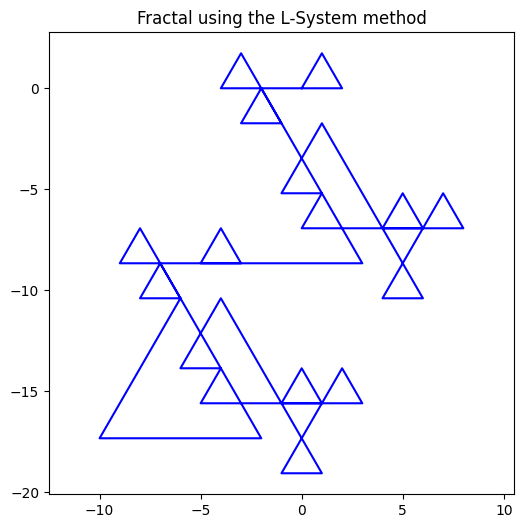

In [45]:
import matplotlib.pyplot as plt
import numpy as np


angle = 60
axiom = "+R"
rules = {
    "R": "RFRF--RFRF--FF",
    "F": "GG",
    "G": "GG"
}

def lsystem(axiom, rules, iterations):
    result = axiom
    for _ in range(iterations):
        result = ''.join([rules.get(c, c) for c in result])
    return result


def draw_lsystem(instructions, angle):
    x, y = 0, 0
    direction = 0
    stack = []
    coords = [(x, y)]

    for cmd in instructions:
        if cmd in "FG":
            rad = np.deg2rad(direction)
            x += np.cos(rad)
            y += np.sin(rad)
            coords.append((x, y))
        elif cmd == '+':
            direction += angle
        elif cmd == '-':
            direction -= angle
        elif cmd == '[':
            stack.append((x, y, direction))
        elif cmd == ']':
            x, y, direction = stack.pop()
            coords.append((x, y))

    xs, ys = zip(*coords)
    plt.figure(figsize=(6, 6))
    plt.plot(xs, ys, color='blue')
    plt.axis('equal')
    plt.title("Fractal using the L-System method")
    plt.show()


instr = lsystem(axiom, rules, iterations=3)
draw_lsystem(instr, angle)

<ipython-input-46-70d29de70746>:21: RuntimeWarning: overflow encountered in multiply
  z = z*z + c
<ipython-input-46-70d29de70746>:21: RuntimeWarning: invalid value encountered in multiply
  z = z*z + c


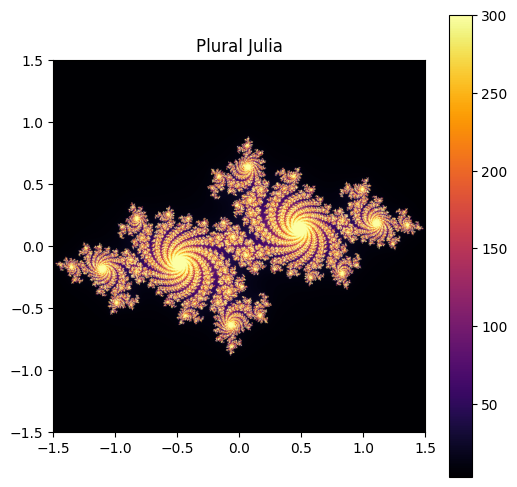

In [46]:
import numpy as np
import matplotlib.pyplot as plt


width, height = 800, 800
zoom = 1
move_x, move_y = 0.0, 0.0
max_iter = 300
c = complex(-0.7, 0.27015)

# Complex plane grid
x = np.linspace(-1.5, 1.5, width)
y = np.linspace(-1.5, 1.5, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Iterative process
def julia(z, c, max_iter):
    output = np.zeros(z.shape, dtype=int)
    for i in range(max_iter):
        z = z*z + c
        mask = np.abs(z) < 1000
        output += mask
    return output


plt.figure(figsize=(6, 6))
plt.imshow(julia(Z, c, max_iter), extent=(-1.5, 1.5, -1.5, 1.5), cmap='inferno')
plt.title("Plural Julia")
plt.colorbar()
plt.show()